In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# import data

In [2]:
#profile = read_csv("/home/scratch/dataset/user_profile.csv", n_max = 1000)
#profile = read_csv("/home/scratch/dataset/profile_with_credit_age.csv")
first              = read_csv("/home/scratch/dataset/engage_first_apply.csv")
engage             = read_csv("/home/scratch/dataset/engage_rest_click_apply_sum.csv")
profile_age_credit = read_csv("/home/scratch/dataset/profile_with_credit_age.csv")
profile            = read_csv("/home/scratch/dataset/user_profile.csv")

Parsed with column specification:
cols(
  user_id = col_character(),
  session_id = col_character(),
  session_length = col_integer(),
  click_count = col_integer(),
  click_count_credit_card = col_integer(),
  click_count_personal_loan = col_integer(),
  click_count_mortgage = col_integer(),
  click_count_credit_repair = col_integer(),
  click_count_banking = col_integer(),
  click_count_auto_products = col_integer(),
  click_apply_count = col_integer(),
  click_count_credit_card.1 = col_integer(),
  click_count_personal_loan.1 = col_integer(),
  click_count_mortgage.1 = col_integer(),
  click_count_credit_repair.1 = col_integer(),
  click_count_banking.1 = col_integer(),
  click_count_auto_products.1 = col_integer(),
  login_platform = col_character()
)
Parsed with column specification:
cols(
  user_id = col_character(),
  session_length = col_integer(),
  click_count = col_integer(),
  click_count_credit_card = col_integer(),
  click_count_personal_loan = col_integer(),
  click_coun

In [3]:
colnames(profile) 

[1] "Unnamed: 0"                               
 [2] "user_id"                                  
 [3] "user_signup_timestamp"                    
 [4] "state"                                    
 [5] "zipcode"                                  
 [6] "is_homeowner"                             
 [7] "gender"                                   
 [8] "tradelines_avg_days_since_opened"         
 [9] "tradelines_max_days_since_opened"         
[10] "tradelines_min_days_since_opened"         
[11] "count_tradelines_closed_accounts"         
[12] "count_total_tradelines_opened_24_months"  
[13] "count_tradelines_cc_opened_24_months"     
[14] "count_tradelines_condition_derogatory"    
[15] "count_open_installment_accounts_24_months"
[16] "count_tradelines_open_collection_accounts"
[17] "count_tradelines_open_mortgages"          
[18] "count_tradelines_open_student_loans"      
[19] "count_tradelines_opened_accounts"         
[20] "count_tradelines_open_secured_loans"      
[21] "count_tradelines_open_unsecured_loans"    
[22] "total_tradelines_amount_past_due"         
[23] "total_open_cc_amount_past_due"            
[24] "total_cc_open_balance"                    
[25] "total_tradelines_open_balance"            
[26] "max_cc_limit"                             
[27] "max_cc_utilization_ratio"                 
[28] "avg_cc_utilization_ratio"                 
[29] "total_mortgage_loans_amount"              
[30] "total_mortgage_loans_balance"             
[31] "total_auto_loans_balance"                 
[32] "total_student_loans_balance"              
[33] "count_inquiries_3_months"                 
[34] "count_inquiries_6_months"                 
[35] "count_inquiries_12_months"                
[36] "recent_bankruptcy_date"                   
[37] "count_bankruptcy"                         
[38] "age_bucket"                               
[39] "credit_score_bucket"

In [4]:
dat_profile = profile %>% select(
    user_id, 
    tradelines_avg_days_since_opened,
    count_tradelines_condition_derogatory,
    count_tradelines_open_collection_accounts,
    total_tradelines_amount_past_due,
    avg_cc_utilization_ratio,
    total_mortgage_loans_amount,
    count_inquiries_3_months,
    count_inquiries_6_months,
    count_inquiries_12_months,
    count_bankruptcy
)

In [5]:
dat_first = first
colnames(dat_first)[2:ncol(dat_first)] = paste0("first_", colnames(dat_first)[2:ncol(dat_first)])
colnames(dat_first) = str_replace(colnames(dat_first), pattern = ".1", replacement = "_apply")
colnames(dat_first)

[1] "user_id"                              
 [2] "first_session_id"                     
 [3] "first_session_length"                 
 [4] "first_click_count"                    
 [5] "first_click_count_credit_card"        
 [6] "first_click_count_personal_loan"      
 [7] "first_click_count_mortgage"           
 [8] "first_click_count_credit_repair"      
 [9] "first_click_count_banking"            
[10] "first_click_count_auto_products"      
[11] "first_click_apply_count"              
[12] "first_click_count_credit_card_apply"  
[13] "first_click_count_personal_loan_apply"
[14] "first_click_count_mortgage_apply"     
[15] "first_click_count_credit_repair_apply"
[16] "first_click_count_banking_apply"      
[17] "first_click_count_auto_products_apply"
[18] "first_login_platform"

In [6]:
dat_engage = engage
colnames(dat_engage) = str_replace(colnames(dat_engage), pattern = ".1", replacement = "_apply")
colnames(dat_engage)

[1] "user_id"                         "session_length"                 
 [3] "click_count"                     "click_count_credit_card"        
 [5] "click_count_personal_loan"       "click_count_mortgage"           
 [7] "click_count_credit_repair"       "click_count_banking"            
 [9] "click_count_auto_products"       "click_apply_count"              
[11] "click_count_credit_card_apply"   "click_count_personal_loan_apply"
[13] "click_count_mortgage_apply"      "click_count_credit_repair_apply"
[15] "click_count_banking_apply"       "click_count_auto_products_apply"

In [7]:
colnames(profile_age_credit)

[1] "user_id"                  "age_bucket"              
[3] "age_bucket_bound_lower"   "age_bucket_bound_upper"  
[5] "age"                      "credit_score_bucket"     
[7] "credit_score_bound_lower" "credit_score_bound_upper"
[9] "credit_bucket"

In [8]:
###
dat = dat_engage %>% 
    inner_join(., profile_age_credit, by = "user_id") %>% 
    inner_join(., dat_first,          by = "user_id") %>% 
    inner_join(., dat_profile,        by = "user_id")

###
dat = dat %>% filter(click_apply_count > 0)

###
print(dim(dat))
colnames(dat)

[1] 62846    51


[1] "user_id"                                  
 [2] "session_length"                           
 [3] "click_count"                              
 [4] "click_count_credit_card"                  
 [5] "click_count_personal_loan"                
 [6] "click_count_mortgage"                     
 [7] "click_count_credit_repair"                
 [8] "click_count_banking"                      
 [9] "click_count_auto_products"                
[10] "click_apply_count"                        
[11] "click_count_credit_card_apply"            
[12] "click_count_personal_loan_apply"          
[13] "click_count_mortgage_apply"               
[14] "click_count_credit_repair_apply"          
[15] "click_count_banking_apply"                
[16] "click_count_auto_products_apply"          
[17] "age_bucket"                               
[18] "age_bucket_bound_lower"                   
[19] "age_bucket_bound_upper"                   
[20] "age"                                      
[21] "credit_score_bucket"                      
[22] "credit_score_bound_lower"                 
[23] "credit_score_bound_upper"                 
[24] "credit_bucket"                            
[25] "first_session_id"                         
[26] "first_session_length"                     
[27] "first_click_count"                        
[28] "first_click_count_credit_card"            
[29] "first_click_count_personal_loan"          
[30] "first_click_count_mortgage"               
[31] "first_click_count_credit_repair"          
[32] "first_click_count_banking"                
[33] "first_click_count_auto_products"          
[34] "first_click_apply_count"                  
[35] "first_click_count_credit_card_apply"      
[36] "first_click_count_personal_loan_apply"    
[37] "first_click_count_mortgage_apply"         
[38] "first_click_count_credit_repair_apply"    
[39] "first_click_count_banking_apply"          
[40] "first_click_count_auto_products_apply"    
[41] "first_login_platform"                     
[42] "tradelines_avg_days_since_opened"         
[43] "count_tradelines_condition_derogatory"    
[44] "count_tradelines_open_collection_accounts"
[45] "total_tradelines_amount_past_due"         
[46] "avg_cc_utilization_ratio"                 
[47] "total_mortgage_loans_amount"              
[48] "count_inquiries_3_months"                 
[49] "count_inquiries_6_months"                 
[50] "count_inquiries_12_months"                
[51] "count_bankruptcy"

In [9]:
table(dat$click_count_credit_card_apply)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
10085 21984 12898  6174  4178  2224  1688  1011   772   429   356   241   171 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  141    88    78    79    42    36    30    19    20    16    15     8     7 
   26    27    28    29    30    31    32    33    34    35    36    40    41 
    9     3     8     4     2     4     3     5     2     4     3     1     1 
   43    46    60    67    73    82 
    1     1     2     1     1     1 

In [19]:
X = dat %>% select(click_count_credit_card_apply, 
                   click_apply_count,
                   
                   age, 
                   credit_bucket, 
                   starts_with("first"), 
                   
                   tradelines_avg_days_since_opened,
                   count_tradelines_condition_derogatory,
                   count_tradelines_open_collection_accounts,
                   total_tradelines_amount_past_due,
                   avg_cc_utilization_ratio,
                   total_mortgage_loans_amount,
                   count_inquiries_3_months,
                   count_inquiries_6_months,
                   count_inquiries_12_months,
                   count_bankruptcy,
                   
                   -contains("session"), 
                   -contains("platform"))

df = model.matrix(~ ., data = X) %>% data.frame %>% select(-contains("intercept"))
head(df)

,click_count_credit_card_apply,click_apply_count,age,credit_bucketfair,credit_bucketgood,credit_bucketpoor,first_click_count,first_click_count_credit_card,first_click_count_personal_loan,first_click_count_mortgage,⋯,tradelines_avg_days_since_opened,count_tradelines_condition_derogatory,count_tradelines_open_collection_accounts,total_tradelines_amount_past_due,avg_cc_utilization_ratio,total_mortgage_loans_amount,count_inquiries_3_months,count_inquiries_6_months,count_inquiries_12_months,count_bankruptcy
3,3,3,47.5,0,0,1,3,0,0,0,⋯,698.22,6,6,0,0.09,0,0,0,1,0
4,1,1,42.5,0,0,1,9,0,0,0,⋯,806.00,2,0,7688,1.09,0,7,8,9,0
5,1,1,52.5,0,0,1,15,0,0,0,⋯,256.00,0,0,0,0.04,0,0,0,3,0
9,0,1,52.5,0,0,1,4,0,0,0,⋯,1231.07,31,0,1801,0.47,86743,0,1,3,1
11,2,4,37.5,0,0,1,44,0,2,0,⋯,946.57,2,1,0,0.92,42500,0,3,11,1
14,1,2,32.5,1,0,0,36,0,0,0,⋯,1542.20,1,1,0,0.26,0,0,2,2,0


In [20]:
y   = "click_count_credit_card_apply"
tmp = colnames(df)
tmp = tmp[!(tmp %in% c(y, 'click_apply_count', "first_click_count", "first_click_apply_count"))]
tmp = paste(tmp, collapse = " + ")
tmp = paste("offset(log(click_apply_count))", tmp, sep = " + ")
tmp = paste(y, tmp, sep = " ~ ")
tmp

[1] "click_count_credit_card_apply ~ offset(log(click_apply_count)) + age + credit_bucketfair + credit_bucketgood + credit_bucketpoor + first_click_count_credit_card + first_click_count_personal_loan + first_click_count_mortgage + first_click_count_credit_repair + first_click_count_banking + first_click_count_auto_products + first_click_count_credit_card_apply + first_click_count_personal_loan_apply + first_click_count_mortgage_apply + first_click_count_credit_repair_apply + first_click_count_banking_apply + first_click_count_auto_products_apply + tradelines_avg_days_since_opened + count_tradelines_condition_derogatory + count_tradelines_open_collection_accounts + total_tradelines_amount_past_due + avg_cc_utilization_ratio + total_mortgage_loans_amount + count_inquiries_3_months + count_inquiries_6_months + count_inquiries_12_months + count_bankruptcy"

In [21]:
fit = glm(as.formula(tmp), 
          family = poisson(link = "log"), 
          data = df)
summary(fit)


Call:
glm(formula = as.formula(tmp), family = poisson(link = "log"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4144  -0.8430   0.2956   0.4508   3.1314  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                               -5.220e-01  2.536e-02 -20.585
age                                        2.474e-03  3.142e-04   7.875
credit_bucketfair                          5.260e-02  2.247e-02   2.341
credit_bucketgood                          2.832e-02  2.466e-02   1.148
credit_bucketpoor                          1.274e-01  2.168e-02   5.877
first_click_count_credit_card              1.540e-02  3.552e-03   4.336
first_click_count_personal_loan           -3.927e-02  8.627e-03  -4.552
first_click_count_mortgage                -1.289e-01  4.804e-02  -2.684
first_click_count_credit_repair           -4.009e-02  3.744e-02  -1.071
first_click_count_banking                 -8.016e-02  9.127e-02  

In [13]:
tmp = coef(fit)[-1]
print(names(tmp))

 [1] "age"                                      
 [2] "credit_bucketfair"                        
 [3] "credit_bucketgood"                        
 [4] "credit_bucketpoor"                        
 [5] "first_click_count_credit_card"            
 [6] "first_click_count_personal_loan"          
 [7] "first_click_count_mortgage"               
 [8] "first_click_count_credit_repair"          
 [9] "first_click_count_banking"                
[10] "first_click_count_auto_products"          
[11] "first_click_count_credit_card_apply"      
[12] "first_click_count_personal_loan_apply"    
[13] "first_click_count_mortgage_apply"         
[14] "first_click_count_credit_repair_apply"    
[15] "first_click_count_banking_apply"          
[16] "first_click_count_auto_products_apply"    
[17] "tradelines_avg_days_since_opened"         
[18] "count_tradelines_condition_derogatory"    
[19] "count_tradelines_open_collection_accounts"
[20] "total_tradelines_amount_past_due"         
[21] "avg_cc_utiliza

In [14]:
head(df[, c("click_apply_count", names(tmp))])

,click_apply_count,age,credit_bucketfair,credit_bucketgood,credit_bucketpoor,first_click_count_credit_card,first_click_count_personal_loan,first_click_count_mortgage,first_click_count_credit_repair,first_click_count_banking,⋯,tradelines_avg_days_since_opened,count_tradelines_condition_derogatory,count_tradelines_open_collection_accounts,total_tradelines_amount_past_due,avg_cc_utilization_ratio,total_mortgage_loans_amount,count_inquiries_3_months,count_inquiries_6_months,count_inquiries_12_months,count_bankruptcy
3,3,47.5,0,0,1,0,0,0,0,0,⋯,698.22,6,6,0,0.09,0,0,0,1,0
4,1,42.5,0,0,1,0,0,0,0,0,⋯,806.00,2,0,7688,1.09,0,7,8,9,0
5,1,52.5,0,0,1,0,0,0,0,0,⋯,256.00,0,0,0,0.04,0,0,0,3,0
9,1,52.5,0,0,1,0,0,0,0,0,⋯,1231.07,31,0,1801,0.47,86743,0,1,3,1
11,4,37.5,0,0,1,0,2,0,0,0,⋯,946.57,2,1,0,0.92,42500,0,3,11,1
14,2,32.5,1,0,0,0,0,0,0,0,⋯,1542.20,1,1,0,0.26,0,0,2,2,0


In [22]:
#new_obj = df[, c("click_apply_count", names(tmp))]
#new_obj$click_apply_count = df$click_apply_count

pred = predict(fit, df)
head(exp(pred))
#head(new_obj)

3         4         5         9        11        14 
2.3503365 0.7065967 0.7173332 0.8253965 1.3092968 1.3510822

In [24]:
tmp = data.frame(y = fit$y, fit = fit$fitted.values, n = exp(fit$offset))
head(tmp)

,y,fit,n
3,3,2.3503365,3
4,1,0.7065967,1
5,1,0.7173332,1
9,0,0.8253965,1
11,2,1.3092968,4
14,1,1.3510822,2


In [57]:
x = tmp %>% mutate(Rate = fit / n) %>% sample_n(1000) %>% arrange(Rate)
x$User = 1:nrow(x)
#x = x %>% sample_n(10000)
head(x)

y,fit,n,Rate,User
1,0.2200799,1,0.2200799,1
0,0.3163234,1,0.3163234,2
1,0.9971645,3,0.3323882,3
0,2.5520919,7,0.3645846,4
1,0.4159074,1,0.4159074,5
0,0.8532297,2,0.4266149,6


Warning message:
“Removed 1 rows containing missing values (position_stack).”

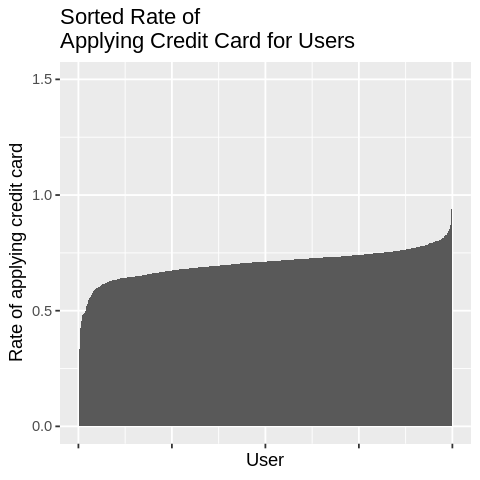

In [62]:
options(repr.plot.height = 4, repr.plot.width = 4)
ggplot(x, aes(x = User, y = Rate)) + 
    geom_bar(stat="identity", width=1.0) + ylim(c(0, 1.5)) + theme(axis.text.x = element_blank()) +
labs(title = "Sorted Rate of\nApplying Credit Card for Users", y = "Rate of applying credit card")

In [111]:
head(fit$y)

3  4  5  9 11 14 
 3  1  1  0  2  1

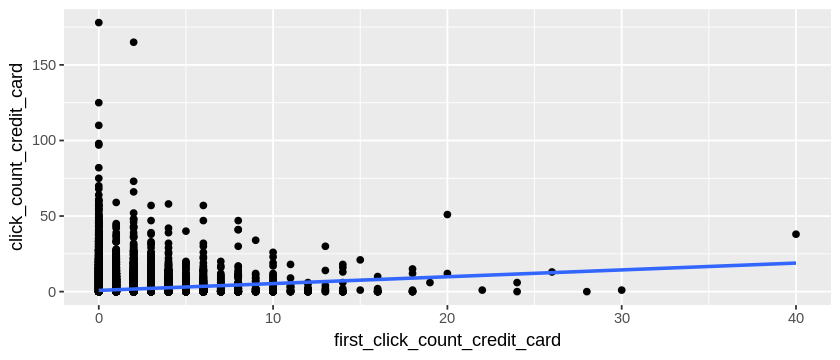

In [7]:
options(repr.plot.height = 3, repr.plotwidth = 3)
df = data.frame(x = dat$first_click_count_credit_card, y = dat$click_count_credit_card)
df %>% 
    ggplot(., aes(x = x, y = y)) + 
    geom_point() + labs(y = "click_count_credit_card", x = "first_click_count_credit_card") + 
    geom_smooth(method = "lm")

In [25]:
col_y = c('click_count_credit_card_apply',
          'click_count_personal_loan_apply', 
          'click_count_mortgage_apply',
          'click_count_credit_repair_apply',
          'click_count_banking_apply',
          'click_count_auto_products_apply')

In [26]:
for (y in col_y){
    print(y)
}

[1] "click_count_credit_card_apply"
[1] "click_count_personal_loan_apply"
[1] "click_count_mortgage_apply"
[1] "click_count_credit_repair_apply"
[1] "click_count_banking_apply"
[1] "click_count_auto_products_apply"


In [10]:
table(dat$click_count_credit_card)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
98208 15408  7624  3613  2685  1577  1269   804   697   520   417   321   259 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  191   180   129   116    88    77    80    59    55    42    32    27    29 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
   20    35    21    10    15    11     9    19     8     9     5     7     7 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
    7     5     4     3     8     2     4     4     6     2     3     1     3 
   52    53    54    55    57    58    59    60    61    64    66    68    70 
    1     1     1     2     5     2     1     2     1     1     1     1     1 
   73    75    82    97    98   110   125   165   178 
    1     1     1     1     1     1     1     1     1 

In [8]:
fit = glm(click_count_credit_card ~ offset(log(click_count)) + first_click_count_credit_card, 
          family = poisson(link = "log"), 
          data = dat)

In [15]:
summary(fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.73355632,0.002934010,-1272.50988,0
first_click_count_credit_card,0.09921845,0.001195306,83.00675,0


In [21]:
colnames(dat)

[1] "user_id"                              
 [2] "session_length"                       
 [3] "click_count"                          
 [4] "click_count_credit_card"              
 [5] "click_count_personal_loan"            
 [6] "click_count_mortgage"                 
 [7] "click_count_credit_repair"            
 [8] "click_count_banking"                  
 [9] "click_count_auto_products"            
[10] "click_apply_count"                    
[11] "click_count_credit_card.1"            
[12] "click_count_personal_loan.1"          
[13] "click_count_mortgage.1"               
[14] "click_count_credit_repair.1"          
[15] "click_count_banking.1"                
[16] "click_count_auto_products.1"          
[17] "age_bucket"                           
[18] "age_bucket_bound_lower"               
[19] "age_bucket_bound_upper"               
[20] "age"                                  
[21] "credit_score_bucket"                  
[22] "credit_score_bound_lower"             
[23] "credit_score_bound_upper"             
[24] "credit_bucket"                        
[25] "first_session_id"                     
[26] "first_session_length"                 
[27] "first_click_count"                    
[28] "first_click_count_credit_card"        
[29] "first_click_count_personal_loan"      
[30] "first_click_count_mortgage"           
[31] "first_click_count_credit_repair"      
[32] "first_click_count_banking"            
[33] "first_click_count_auto_products"      
[34] "first_click_apply_count"              
[35] "first_click_count_credit_card_apply"  
[36] "first_click_count_personal_loan_apply"
[37] "first_click_count_mortgage_apply"     
[38] "first_click_count_credit_repair_apply"
[39] "first_click_count_banking_apply"      
[40] "first_click_count_auto_products_apply"
[41] "first_login_platform"

In [20]:
head(cbind(dat$click_count_credit_card, fit$fitted.values), 10)

1,1,1.63269540
2,0,0.16735363
3,0,0.57378387
4,9,0.90849112
5,1,0.02390766
6,0,0.52596854
7,0,0.09563064
8,0,0.62159919
9,0,0.09563064
10,4,0.54987621


In [11]:
for (x in (dat_first %>% select(-user_id, -first_session_id, -first_session_length) %>% colnames)){
    print(x)
}

[1] "first_click_count"
[1] "first_click_count_credit_card"
[1] "first_click_count_personal_loan"
[1] "first_click_count_mortgage"
[1] "first_click_count_credit_repair"
[1] "first_click_count_banking"
[1] "first_click_count_auto_products"
[1] "first_click_apply_count"
[1] "first_click_count_credit_card_apply"
[1] "first_click_count_personal_loan_apply"
[1] "first_click_count_mortgage_apply"
[1] "first_click_count_credit_repair_apply"
[1] "first_click_count_banking_apply"
[1] "first_click_count_auto_products_apply"
[1] "first_login_platform"


In [29]:
cor(dat$first_click_count_credit_card, dat$click_count_credit_card)

[1] 0.1295419